# **기본 CNN 내용**

MNIST 데이터 셋 다운로드

In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

데이터 확인

In [22]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(60000, 28, 28)
(48000,)
(10000, 28, 28)
(10000,)


10개 미리보기

<function matplotlib.pyplot.show(close=None, block=None)>

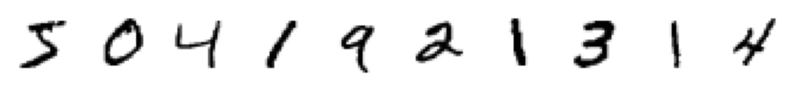

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show

In [24]:
model = keras.Sequential()

In [25]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.add(keras.layers.MaxPooling2D(2))

In [27]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [28]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

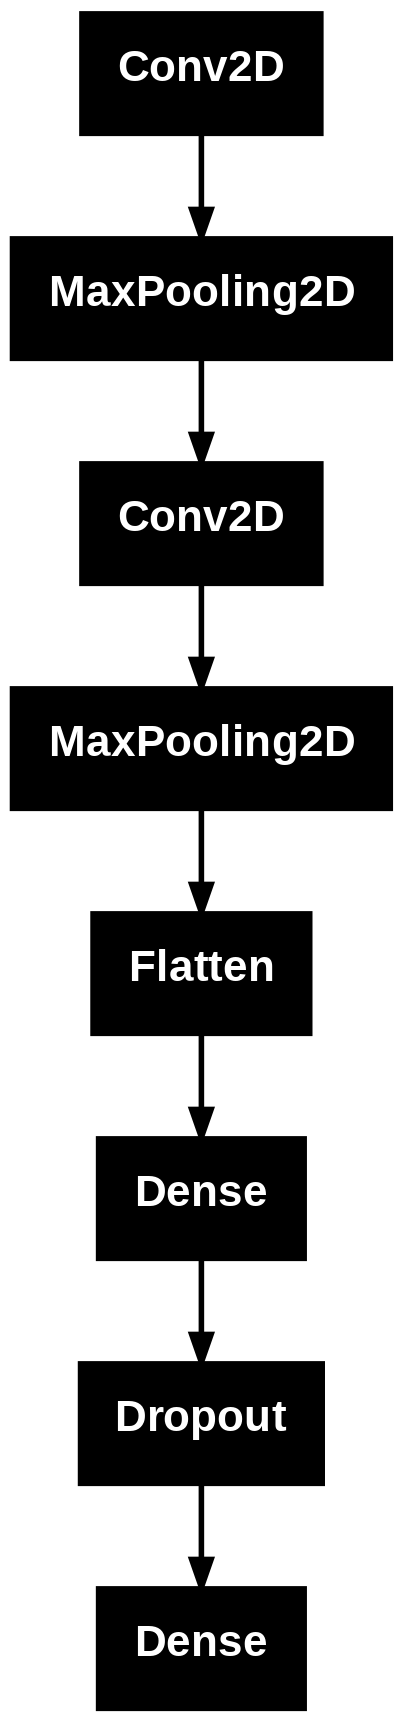

In [30]:
keras.utils.plot_model(model)

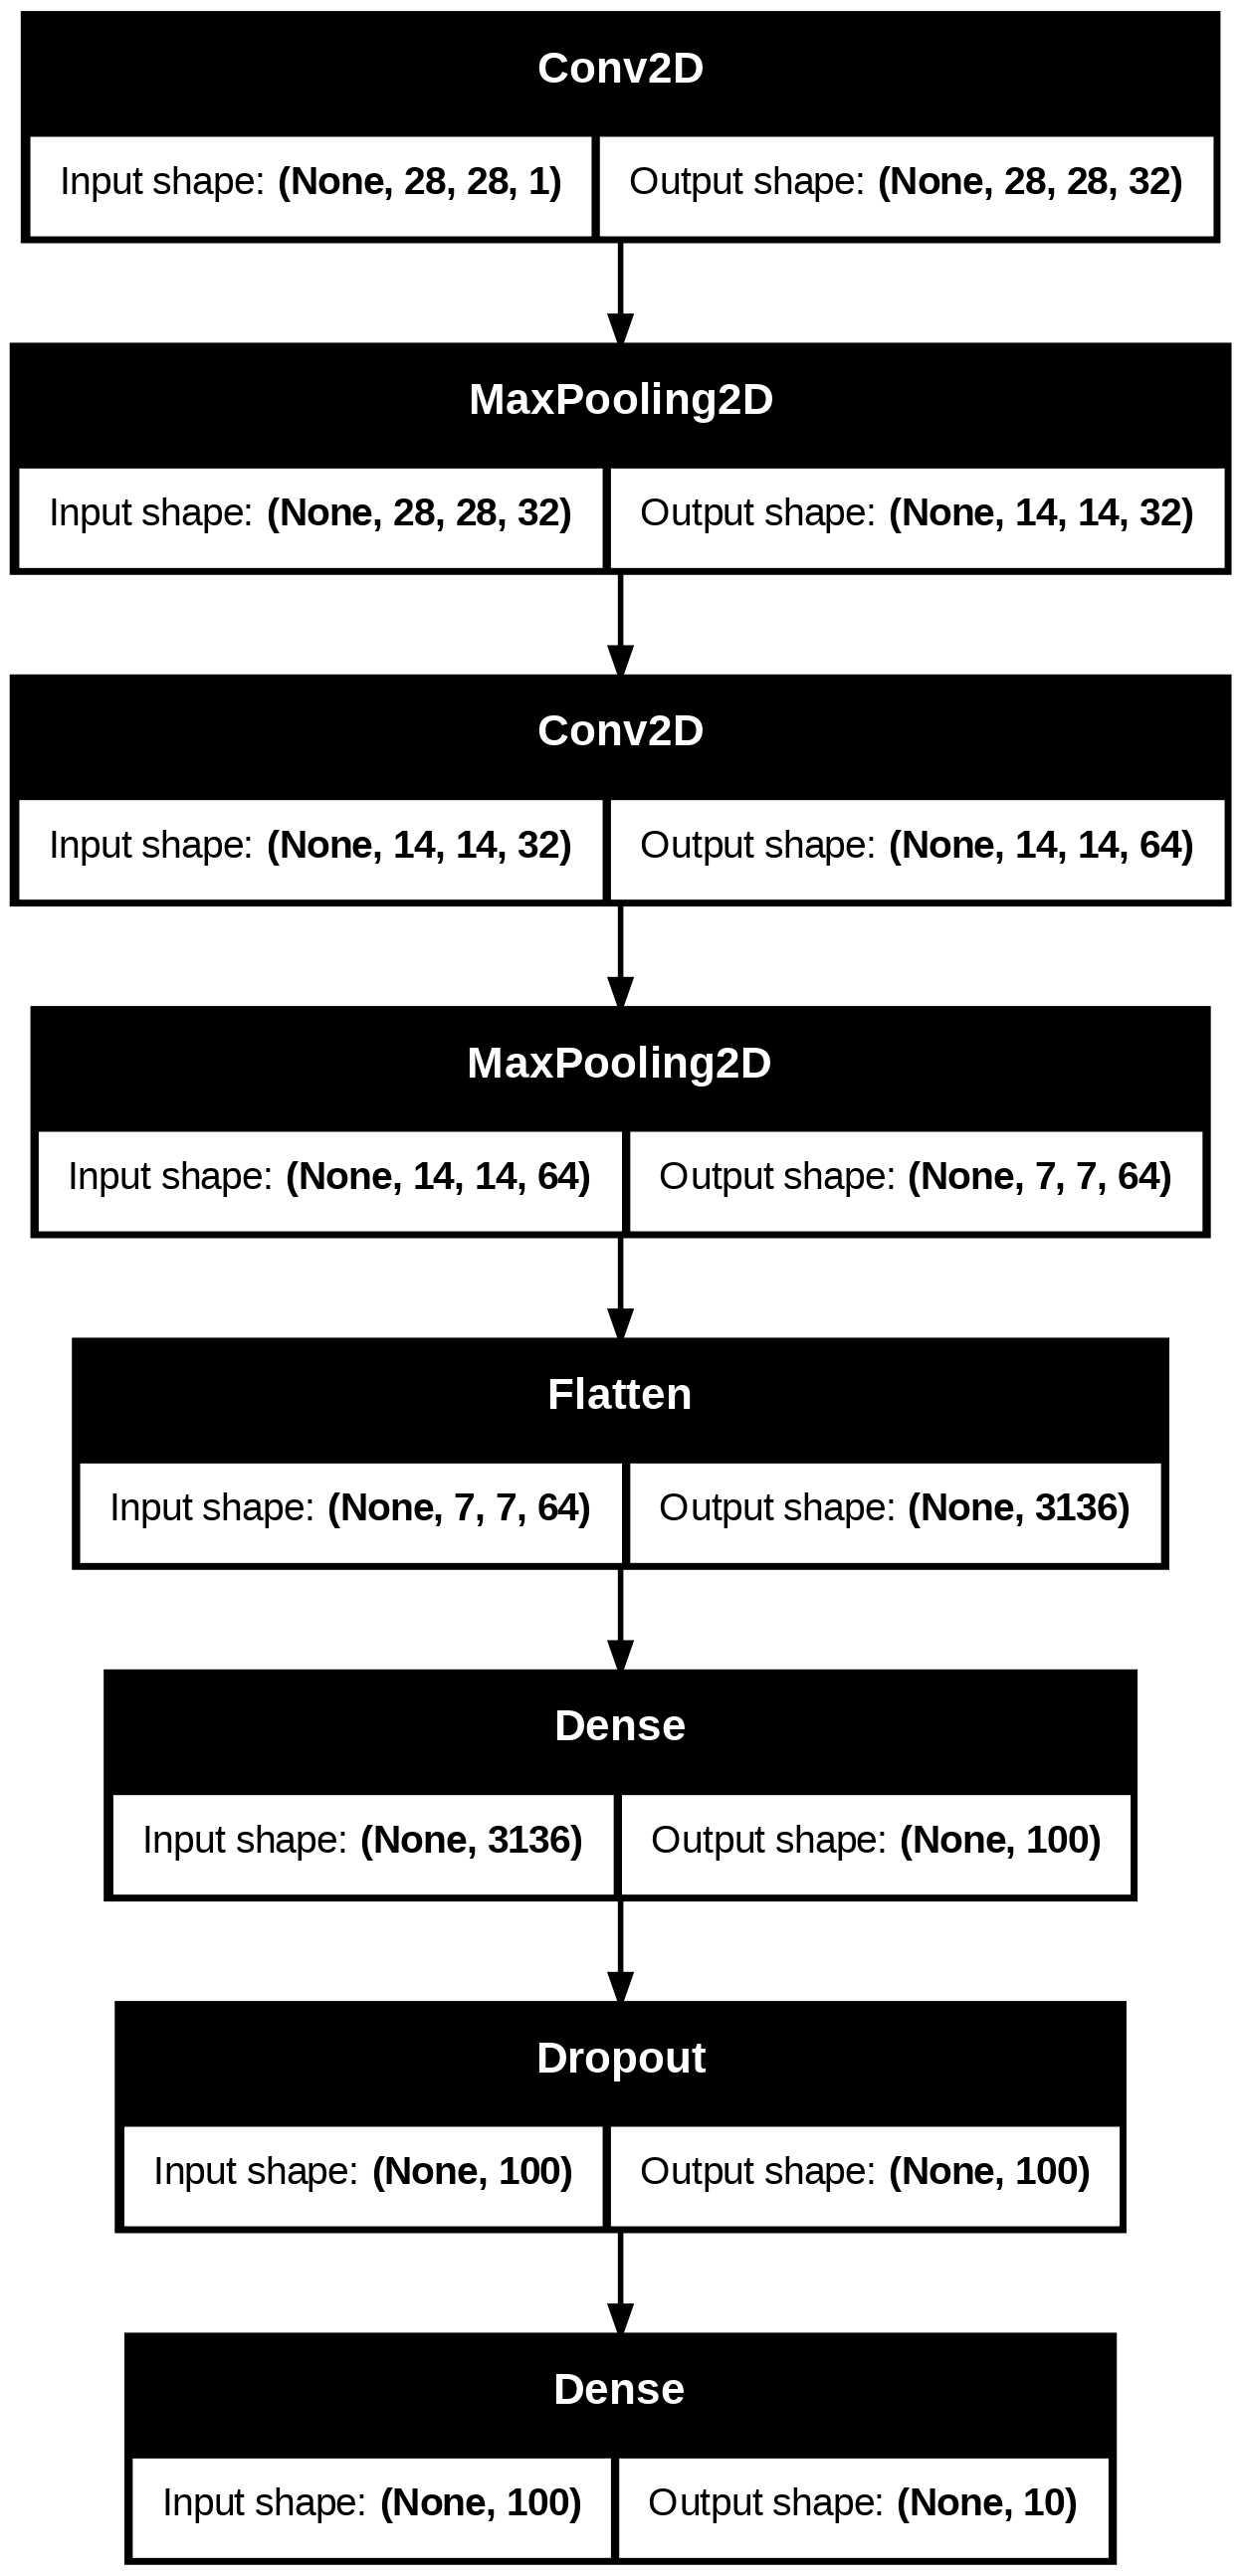

In [31]:
keras.utils.plot_model(model, show_shapes=True)

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
#                                                   restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=30,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb]) # early_stopping_cb removed

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.8601 - loss: 0.4508 - val_accuracy: 0.9840 - val_loss: 0.0537
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9759 - loss: 0.0805 - val_accuracy: 0.9858 - val_loss: 0.0459
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9812 - loss: 0.0630 - val_accuracy: 0.9874 - val_loss: 0.0411
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9855 - loss: 0.0448 - val_accuracy: 0.9913 - val_loss: 0.0313
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9889 - loss: 0.0359 - val_accuracy: 0.9900 - val_loss: 0.0367
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9899 - loss: 0.0309 - val_accuracy: 0.9910 - val_loss: 0.0345
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9914 - val_loss: 0.0326
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9923 -

In [33]:
import matplotlib.pyplot as plt

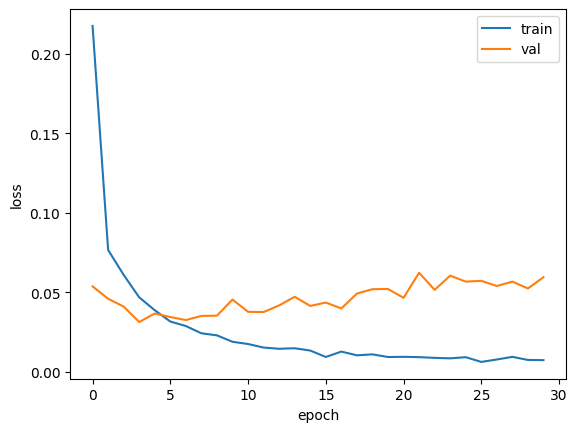

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

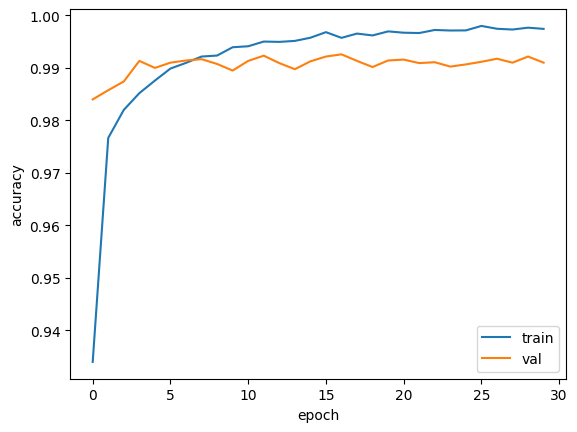

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [38]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9915 - loss: 0.0600


[0.05949213728308678, 0.9909999966621399]

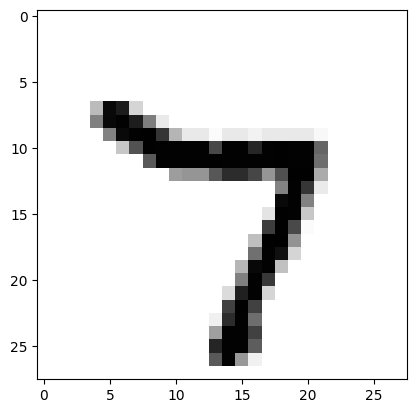

In [39]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [40]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[3.74785054e-37 8.06611853e-24 4.06229008e-26 1.22252024e-26
  1.60418298e-22 2.81220920e-29 0.00000000e+00 1.00000000e+00
  1.38541358e-33 5.02321987e-22]]


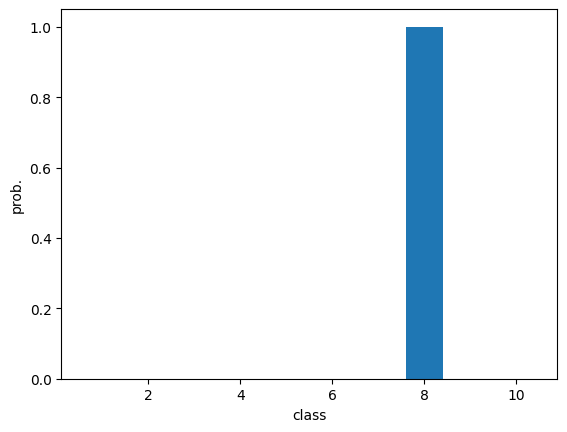

In [41]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [42]:
classes = ['0', '1', '2', '3', '4',
           '5', '6', '7', '8', '9']

In [43]:
import numpy as np
print(classes[np.argmax(preds)])

7


In [44]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [45]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9905 - loss: 0.0504


[0.04294876381754875, 0.9922000169754028]

# **10 X 10 다운 스케일 CNN**

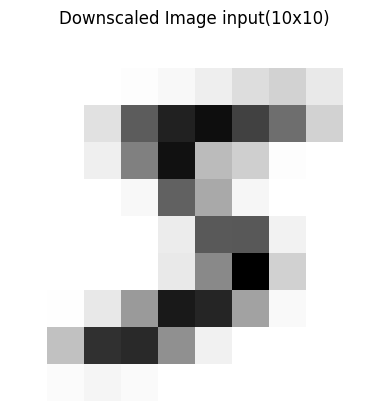

Original shape: (60000, 28, 28)
Downscaled shape: (60000, 10, 10)
Downscaled shape_test: (10000, 10, 10)


In [46]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_input contains your MNIST images (60000, 28, 28)
# If not, replace train_input with your data
downscaled_images_input = np.zeros((train_input.shape[0], 10, 10), dtype=np.float32)
downscaled_images_input_test = np.zeros((test_input.shape[0], 10, 10), dtype=np.float32)

for i in range(train_input.shape[0]):
    downscaled_images_input[i] = resize(train_input[i], (10, 10), anti_aliasing=True)



# Display an example of a downscaled image
plt.imshow(downscaled_images_input[0], cmap='gray_r')
plt.title('Downscaled Image input(10x10)')
plt.axis('off')
plt.show()

print("Original shape:", train_input.shape)
print("Downscaled shape:", downscaled_images_input.shape)
print("Downscaled shape_test:", downscaled_images_input_test.shape)


In [47]:
print(downscaled_images_input.shape)
print(train_target.shape)
print(downscaled_images_input_test.shape)
print(test_target.shape)

(60000, 10, 10)
(48000,)
(10000, 10, 10)
(10000,)


**이제 해보시오. 숙제.**

과정 : 모델 만들기,학습시키기,검증하기,테스트하기


Gemini가 잘 알려줌